Анастасия Плавина

### Тема: Многомерный статистический анализ. Линейная регрессия

#### Задача 1

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. Является ли значимым получившееся уравнение регрессии?


In [1]:
import numpy as np

X = np.array(
    [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], 
     [-0.18757272, 1.30337355, 5.12093014, 3.46363202], 
     [-0.81094525, 1.82463398, 5.79686488, 1.86159445], 
     [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], 
     [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], 
     [-0.62972637, 0.77750764, 2.84124027, 4.54410559], 
     [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], 
     [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], 
     [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], 
     [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

y = np.array([9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 
     7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

Воспользуемся методом наименьших квадратов для уравнения линейной регрессии $Y = X \cdot b + E$ и найдем коэффиценты $b$.

In [2]:
def two_factors_r_2(X, y):
    """Подсчет коэффицента детерминации линейной регрессии
    """
  
    #  добавление к матрице столбца с единицами
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    
    # подсчет коэффицентов для уравнения линейной регрессии
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    b = XTX_inv.dot(X.T).dot(y)
    
    # подсчет ошибок
    y_pred = X.dot(b)
    e = y - y_pred
    
    # подсчет r2
    return 1 - e.var() / y.var()

Применим функцию для всевозможных парных срезов массива X и выберем комбинацию факторов, при которой R2 максимальный:

In [3]:
r2s = []

for i1 in range(3):
    for i2 in range(i1+1, 4):
        r2 = two_factors_r_2(X[:, [i1,i2]], y)
        r2s.append(((i1,i2), r2))
        
r2s.sort(key=lambda x:-x[1])
r2s

[((0, 2), 0.7634246238793152),
 ((2, 3), 0.622441987650532),
 ((1, 3), 0.6062055761129931),
 ((1, 2), 0.547948273403901),
 ((0, 3), 0.4532966783144077),
 ((0, 1), 0.18113594742585215)]

In [4]:
r2 = round(r2s[0][1],2)

print('1-ый и 3-ий признак \t R2', r2)

1-ый и 3-ий признак 	 R2 0.76


Проверим значимость коэффицентa:

$H_0$: коэффицент детерминации равен 0

Используем F-тест:

$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)}$

In [5]:
def f_test(R, k1, k2):
    """F-тест для проверки коэффицента детерминации
    """
    
    return (R / k1) / ((1 - R) / k2)

Найдем $k_1$ и $k_2$:

In [6]:
n = X.shape[0]
m = 2

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

В предположении верности $H_0$ статистика имеет распределение Фишера, найдем нужный квантиль при уровне значимости alpha = 0.05:

In [7]:
from scipy import stats
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

Проверим значимость полученного коэффицента r2:

In [8]:
f_test(r2, k1, k2)

11.083333333333332

Значение статистики попадает в критическую область => $H_0$ отвергаем => коэффицент детерминации 0.76 считаем значимым

#### Задача 2

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

$H_0$: конверсия на странице B не отличается от конверсии на странице A.

Посчитаем среднюю конверсию для страниц A и B, и общую среднюю конверсию для страницы в целом

In [18]:
n1 = 2509
n2 = 1465

y1_mean = 77/2509
y2_mean = 60/1465
y_mean = (60+77)/(2509+1465)

y1_mean, y2_mean, y_mean

(0.03068951773614986, 0.040955631399317405, 0.03447408152994464)

Найдем отклонение между группами по формуле $S_b^2 = \displaystyle\sum_{i=1}^k \left( \overline{Y_i} - \overline{Y} \right)^2 n_i$:

In [10]:
S2_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2
S2_b

0.09748158004016791

Найдем отклонение внутри групп по формуле $S_w^{2} = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2$:

Считаем, что данные для страницы А содержат 77 успехов (единиц) и (2509-77) неуспехов (нулей), для страницы B в данных 60 единиц и (1465-60) нулей, подставим в формулу:

$S_w^{2} = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2 = \displaystyle\sum_{j=1}^{1465} \left(\{0,1\} - 0.04 \right)^2 + \displaystyle\sum_{j=1}^{2509} \left(\{0,1\} - 0.03 \right)^2 = $
$ = (1465-60) \cdot 0.04^2 + 60 \cdot (1-0.04)^2 + (2509-77) \cdot 0.03^2 + 77 \cdot (1-0.03)^2$

In [11]:
S2_w = (1465-60) * 0.04**2 + 60 * (1-0.04)**2 + (2509-77) * 0.03**2 + 77 * (1-0.03)**2
S2_w

132.1821

Найдем несмещённые оценки дисперсий:

In [12]:
k = 2
n = n1 + n2

k1 = k - 1
k2 = n - k

sigma2_b = S2_b / k1
sigma2_w = S2_w / k2

sigma2_b, sigma2_w

(0.09748158004016791, 0.03327847432024169)

Посчитаем статистику F:

In [13]:
F = sigma2_b / sigma2_w
F

2.929268304252595

При уровне значимости alpha = 0.05 найдем квантиль распределения Фишера:

In [14]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8438010503414866

Статистика не попадает в критическую область => $H_0$ остается в силе и отличие конверсий на страницах A и В не значимо.

#### Задача 3

__Квартет Энскомба__ — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

```
{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
```

По каждой паре выборок посчитайте:

1. выборочное среднее и дисперсию каждой выборки,
2. коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте `scatter plot` по каждой паре выборок.

In [15]:
import matplotlib.pyplot as plt 

data = {
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

x1
Mean 		 9.0
Variance 	 11.0
y1
Mean 		 7.5
Variance 	 4.13


Corr.coef 	 0.82
Lin. regr
coefs 		 (3.0, 0.5001)
--------------------
x2
Mean 		 9.0
Variance 	 11.0
y2
Mean 		 7.5
Variance 	 4.13


Corr.coef 	 0.82
Lin. regr
coefs 		 (3.0009, 0.5)
--------------------
x3
Mean 		 9.0
Variance 	 11.0
y3
Mean 		 7.5
Variance 	 4.12


Corr.coef 	 0.82
Lin. regr
coefs 		 (3.0027, 0.4997)
--------------------
x4
Mean 		 9.0
Variance 	 11.0
y4
Mean 		 7.5
Variance 	 4.12


Corr.coef 	 0.82
Lin. regr
coefs 		 (3.0018, 0.4999)
--------------------


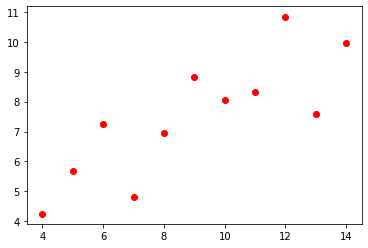

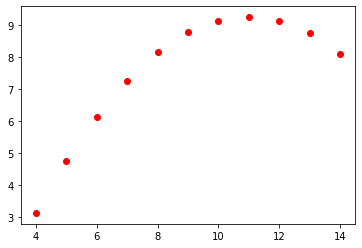

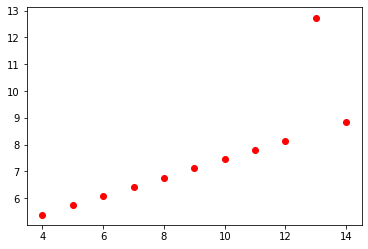

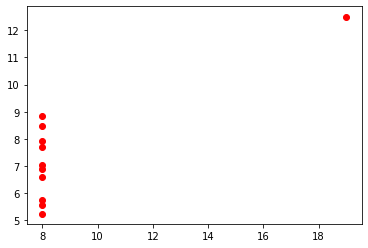

In [16]:
for i in range (1, 5):
    x = data['x'+str(i)]
    y = data['y'+str(i)]
    b1 = round(np.cov(x, y, ddof=0)[0][1] / np.var(x, ddof=0), 4)
    b0 = round(np.mean(y) - b1 * np.mean(x), 4)
    print(f'x{i}')
    print('Mean \t\t', np.mean(x))
    print('Variance \t', np.var(x, ddof=1))
    print(f'y{i}')
    print('Mean \t\t', round(np.mean(y), 2))
    print('Variance \t', round(np.var(y, ddof=1), 2))
    print('\n')
    print('Corr.coef \t', round(np.corrcoef(x , y)[0][1], 2))
    print(f'Lin. regr\ncoefs \t\t {b0, b1}')
    print('--------------------')
    fig, ax = plt.subplots()
    plt.scatter(x,y, c='r')